# Assignment a4
In this assignment, you'll work through a dataset that is similar in format to our inflammation dataset. 

## Step 1: Import the necessary packages

Below, import `numpy` as `np` and `matplotlib.pyplot` as `plt`.

In [1]:
### BEGIN SOLUTION
import numpy as np
import matplotlib.pyplot as plt
### END SOLUTION

In [2]:
# Tests for Step 1, 5 pts
import sys
assert 'numpy' in sys.modules
assert 'matplotlib.pyplot' in sys.modules

In [3]:
# Two more tests for Step 1, 5 pts
assert 'np' in dir()
assert 'plt' in dir()

## Step 2: Load our data as a numpy array
In the cell below, load our file, called 'pain_data.csv'.

1. Assign this array to a variable called `pain_data`.
2. Assign the shape of this array to `data_shape`.

In [4]:
### BEGIN SOLUTION
pain_data = np.loadtxt(fname='pain_data.csv', delimiter=',')
data_shape = pain_data.shape
print(data_shape)
### END SOLUTION

(120, 8)


In [5]:
# Tests for Step 2, 5 pts
assert isinstance(pain_data,np.ndarray)
assert isinstance(data_shape,tuple)

In [6]:
# Hidden tests for Step 2, 5 pts
### BEGIN HIDDEN TESTS
assert pain_data[0,0] == 19.0
assert data_shape == (120, 8)
### END HIDDEN TESTS

## Step 3: Divide into control and treatment groups
In this data set, each row is a patient, and each column is the hour of the test. The first 60 patients (in the first 60 rows) in this study were in the control group. The second group of patients were in a treatment group. Divide `pain_data` into two separate `control` and `treatment` arrays accordingly.

In [7]:
### BEGIN SOLUTION
control = pain_data[:60,:]
treatment = pain_data[-60:,:]
### END SOLUTION

In [8]:
# Tests for Step 3, worth 5 pts
assert isinstance(control,np.ndarray)
assert isinstance(treatment,np.ndarray)

In [9]:
# Hidden tests for Step 3, worth 5 pts
### BEGIN HIDDEN TESTS
assert control.shape == (60,8)
assert treatment.shape == (60,8)
### END HIDDEN TESTS

## Step 4: Create a histogram to compare baseline measures
As a first check, we want to make sure that our control and treatment groups have similar baseline distributions. **The first hour of this dataset (the first column) has the baseline values.**

To compare our baseline values, generate two side-by-side subplots. The left plot should show a histogram (using `plt.hist()`) of the control group values, the right plot should show a histogram of the treatment group values. **You do not need to add any axis labels or titles to these plots**. 

Please be sure that you have a `plt.show()` command at the end of your cell.

*Note*: This question is manually graded. There is no test cell.

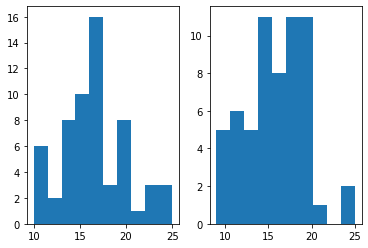

In [10]:
### BEGIN SOLUTION
fig, ax = plt.subplots(1,2)
ax[0].hist(control[:,0])
ax[1].hist(treatment[:,0])
plt.show()
### END SOLUTION

## Step 5: Generate an average trajectory for each group
Next, we'd like to generate an average pain calculation across the entire eight hour period for our control and treatment groups. In other words, what is the average pain trajectory from hours 0 to 7 for each of our groups?

Using `np.mean()`, calculate an average value across all control patients and assign it to `control_mean`. Calculate an average value across all treatment patients and assign it to `treatment_mean`. 

In [11]:
### BEGIN SOLUTION
control_mean = np.mean(control,axis=0)
treatment_mean = np.mean(treatment,axis=0)
### END SOLUTION

In [12]:
# Tests for step 5, 2 pts
assert isinstance(control_mean,np.ndarray)
assert isinstance(treatment_mean,np.ndarray)

In [13]:
# Hidden tests for step 5, 4 pts
### BEGIN HIDDEN TESTS
assert control_mean.shape == (8,)
assert treatment_mean.shape == (8,)
### END HIDDEN TESTS

In [14]:
# Hidden tests, part II, 4 pts
### BEGIN HIDDEN TESTS
assert control_mean[1] == 11.7
assert treatment_mean[1] == 13.45
### END HIDDEN TESTS

## Step 6: Plot the average trajectory

Below, create **one** plot that contains all eight hours of data for your control and treatment groups, plotted as two separate lines.

### Tips:
* Write two `plt.plot()` lines after one another to draw multiple lines on the same plot. For example:
```plt.plot(x)
plt.plot(y)
```
* Create a legend with `plt.legend()`. This function takes one argument that is a list of all of the legend labels. For example:
```
plt.legend(['x data','y data'])
```

### Grading:
For full credit on this manually graded question, your graph must include:
* Two separate lines on one plot that represent the mean pain across eight hours of data for control and treatment groups.
* A legend that shows which group is which
* An x-axis label `Hour`
* A y-axis label `Pain`
* A final line with a `plt.show()` command

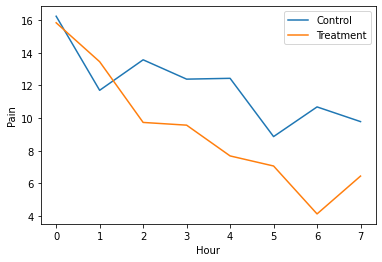

In [15]:
### BEGIN SOLUTION
plt.plot(control_mean)
plt.plot(treatment_mean)
plt.legend(['Control','Treatment'])
plt.xlabel('Hour')
plt.ylabel('Pain')
plt.show()
### END SOLUTION

## Step 7: Check to see how many patients did not respond to treatment
Finally, let's see if there are any patients that did *not* respond to treatment. We will define patients as resistant if their pain rating was 10 or higher throughout the treatment period.

Write code below that determines how many of the treatment patients *never* had a pain rating lower than 10 (in other words, their lowest pain was always more than 9) and assigns this to `resistant_patients`.

### Tips:
* You can calculate the minimum values using `np.min()`.
* One way to do this includes a `for` loop that loops through each patient, counting up the `resistant_patients` along the way.

In [19]:
### SOLUTION 1
lowest_pain = np.min(treatment,axis=1)

resistant_patients = 0

for this_patient in range(60):
    if lowest_pain[this_patient] > 9:
        resistant_patients = resistant_patients + 1
    
print(resistant_patients)

### SOLUTION 2
treatment_min =np.min(treatment,axis=1)
resistant = treatment_min[treatment_min>9]
resistant_patients = len(resistant)
print(resistant_patients)

3
3


In [17]:
# Test cell for Step 7 (5 pts)
assert isinstance(resistant_patients,int)

In [18]:
# Hidden tests for Step 7 (5 pts)
# Hidden tests
### BEGIN HIDDEN TESTS
assert resistant_patients == 3
### END HIDDEN TESTS